# **Preprocessing of Sales, Item, Promotions and Supermarket CSVs**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Define the file path
file_path1 = '/content/drive/MyDrive/Expernetic/item.csv'
file_path2 = '/content/drive/MyDrive/Expernetic/promotion.csv'
file_path3 = '/content/drive/MyDrive/Expernetic/sales.csv'
file_path4 = '/content/drive/MyDrive/Expernetic/supermarkets.csv'

# Load the CSV into a Pandas DataFrame
item_df = pd.read_csv(file_path1)
promotion_df = pd.read_csv(file_path2)
sales_df = pd.read_csv(file_path3)
supermarkets_df = pd.read_csv(file_path4)

In [ ]:
item_df.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK,Type 1,Bisquick,6.75 OZ


In [ ]:
# Check if 'code' column has all unique values
is_unique = item_df['code'].is_unique

if is_unique:
    print("All values in the 'code' column are unique.")
else:
    print("There are duplicate values in the 'code' column.")
    # Optionally, display the duplicate codes
    duplicate_codes = item_df['code'][item_df['code'].duplicated()]
    print("Duplicate codes:", duplicate_codes.unique())


All values in the 'code' column are unique.


In [ ]:
# Identify rows where 'size' contains a hash symbol (#)
hash_symbol_rows = item_df[item_df['size'].str.contains('#', na=False)]

# Display the rows
hash_symbol_rows.head()

,code,descrption,type,brand,size
63,7075304162,ANTOINES CAVATAPPI 12 OZ,Type 2,Antoine's,KH# 2793
161,7067000721,DA VINCI LASAGNA 16 OZ,Type 2,DaVinci,KH# 6862
194,2409407009,DECECCO CAPELLINI 16OZ,Type 2,Dececco,KH# 8652
195,2409407011,DECECCO SPAGHETTINI 16OZ,Type 2,Dececco,KH# 8651
196,2409407012,DECECCO SPAGHETTI 16OZ,Type 2,Dececco,KH# 8623


In [ ]:
# Replace entire values in 'size' column containing '#' with an empty string
item_df.loc[item_df['size'].str.contains('#', na=False), 'size'] = ''

# Verify the changes
print(item_df[item_df['size'] == ''])  # Display rows with empty 'size' values


           code                      descrption    type          brand size
63   7075304162        ANTOINES CAVATAPPI 12 OZ  Type 2      Antoine's     
161  7067000721          DA VINCI LASAGNA 16 OZ  Type 2        DaVinci     
194  2409407009       DECECCO CAPELLINI    16OZ  Type 2        Dececco     
195  2409407011       DECECCO SPAGHETTINI  16OZ  Type 2        Dececco     
196  2409407012       DECECCO SPAGHETTI    16OZ  Type 2        Dececco     
198  2409407034       DECECCO FUSILLI      16OZ  Type 2        Dececco     
199  2409407040       DECECCO PENNE REGATE 16OZ  Type 2        Dececco     
200  2409407041       DECECCO PENNE RIGATE 16OZ  Type 2        Dececco     
216  7546203420       DELL ALPE TORTELLINI 7 OZ  Type 2      Dell Alpe     
221  7546203810       DEL ALPE EGG FETTUCINE 8Z  Type 2      Dell Alpe     
223  7546203814       D A TRI COLR FETTUCINE 8Z  Type 2      Dell Alpe     
227  7546203826        DEL ALPE ANGEL HAIR 8 OZ  Type 2      Dell Alpe     
261  7151800

In [ ]:
# Combine 'description' and 'size' with a space in between
item_df['descrption'] = item_df['descrption'] + ' ' + item_df['size'].astype(str)

# Verify the changes
print(item_df[['descrption', 'size']].head())


                           descrption      size
0  AUNT JEM ORIGINAL PANCAKE MIX 2 LB      2 LB
1  A/JEM COMPLETE PANCAKE MI 32    OZ  32    OZ
2     AJ BUTTERMILK PANCAKE MIX 32 OZ     32 OZ
3       A J BTRMLK COMP PNCK MIX 1 LB      1 LB
4   BC PANCAKE MIX BUTTERMILK 6.75 OZ   6.75 OZ


In [ ]:
item_df.head()

,code,descrption,type,brand,size
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2 LB
1,3000005070,A/JEM COMPLETE PANCAKE MI 32 OZ,Type 1,Aunt Jemima,32 OZ
2,3000005300,AJ BUTTERMILK PANCAKE MIX 32 OZ,Type 1,Aunt Jemima,32 OZ
3,3000005350,A J BTRMLK COMP PNCK MIX 1 LB,Type 1,Aunt Jemima,1 LB
4,1600015760,BC PANCAKE MIX BUTTERMILK 6.75 OZ,Type 1,Bisquick,6.75 OZ


In [ ]:
# Drop the 'size' column
item_df = item_df.drop(columns=['size'])

# Verify the changes
item_df.head()


,code,descrption,type,brand
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima
1,3000005070,A/JEM COMPLETE PANCAKE MI 32 OZ,Type 1,Aunt Jemima
2,3000005300,AJ BUTTERMILK PANCAKE MIX 32 OZ,Type 1,Aunt Jemima
3,3000005350,A J BTRMLK COMP PNCK MIX 1 LB,Type 1,Aunt Jemima
4,1600015760,BC PANCAKE MIX BUTTERMILK 6.75 OZ,Type 1,Bisquick


In [ ]:
# Check for null values in the item_df
null_values = item_df.isnull().sum()

# Display the count of null values per column
print(null_values)


code          0
descrption    0
type          0
brand         0
dtype: int64


In [ ]:
# Check for empty cells in item_df (cells that are empty strings '')
empty_cells = item_df[item_df.eq('').any(axis=1)]

# Display rows with empty cells
print(empty_cells)


Empty DataFrame
Columns: [code, descrption, type, brand]
Index: []


In [ ]:
# Fix the 'time' column: Convert to HH:MM format
sales_df['hour'] = sales_df['time'] // 100  # Extract hour
sales_df['minute'] = sales_df['time'] % 100  # Extract minute
sales_df['formatted_time'] = sales_df['hour'].astype(str).str.zfill(2) + ':' + sales_df['minute'].astype(str).str.zfill(2)

# Combine week and day for a relative time index
sales_df['week_day'] = 'Week ' + sales_df['week'].astype(str) + ', Day ' + sales_df['day'].astype(str)

# Combine week, day, and time into a relative datetime-like column
sales_df['relative_datetime'] = (
    sales_df['week'].astype(str) + '-' + sales_df['day'].astype(str) + ' ' + sales_df['formatted_time']
)

# Drop intermediate columns if not needed
sales_df = sales_df.drop(columns=['hour', 'minute'])

# Display a preview of the processed DataFrame
sales_df.head()


,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher,formatted_time,week_day,relative_datetime
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,11:00,"Week 1, Day 1",1-1 11:00
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,11:00,"Week 1, Day 1",1-1 11:00
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,11:37,"Week 1, Day 1",1-1 11:37
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,11:48,"Week 1, Day 1",1-1 11:48
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,13:23,"Week 1, Day 1",1-1 13:23


In [ ]:
# Step 1: Left outer join between item_df and sales_df on the 'code' column
sales_combined_df = pd.merge(item_df, sales_df, on='code', how='left')

# Step 2: Inner join between the result and supermarkets_df on 'supermarket' and 'Supermarket No'
sales_combined_df = pd.merge(
    sales_combined_df,
    supermarkets_df,
    left_on='supermarket',
    right_on='supermarket_No',
    how='inner'
)

# Drop redundant columns if needed (e.g., duplicate supermarket columns)
sales_combined_df = sales_combined_df.drop(columns=['supermarket_No'])

# Display a preview of the resulting DataFrame
sales_combined_df.head()


,code,descrption,type,brand,amount,units,time,province,week,customerId,supermarket,basket,day,voucher,formatted_time,week_day,relative_datetime,postal-code
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2019.0,2.0,1.0,103614.0,378.0,640.0,1.0,0.0,20:19,"Week 1, Day 1",1-1 20:19,40216
1,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,938.0,2.0,1.0,96049.0,309.0,1019.0,1.0,0.0,09:38,"Week 1, Day 1",1-1 09:38,40241
2,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,1214.0,2.0,1.0,105407.0,280.0,1047.0,1.0,0.0,12:14,"Week 1, Day 1",1-1 12:14,40324
3,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,955.0,2.0,1.0,487249.0,372.0,1169.0,1.0,0.0,09:55,"Week 1, Day 1",1-1 09:55,40515
4,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,1101.0,2.0,1.0,23188.0,372.0,1171.0,1.0,0.0,11:01,"Week 1, Day 1",1-1 11:01,40515


In [ ]:
# Check for null values in each column
null_counts = sales_combined_df.isnull().sum()

# Display the columns with null values and their counts
print("Null values in sales_combined_df:")
print(null_counts[null_counts > 0])


Null values in sales_combined_df:
Series([], dtype: int64)


In [ ]:
# Step 1: Left outer join between item_df and promotion_df on the 'code' column
promotion_combined_df = pd.merge(item_df, promotion_df, on='code', how='left')

# Step 2: Inner join with supermarkets_df on 'supermarket' and 'Supermarket No'
promotion_combined_df = pd.merge(
    promotion_combined_df,
    supermarkets_df,
    left_on='supermarkets',
    right_on='supermarket_No',
    how='inner'
)

# Drop redundant columns if needed (e.g., duplicate supermarket columns)
promotion_combined_df = promotion_combined_df.drop(columns=['supermarket_No'])

# Display a preview of the resulting DataFrame
promotion_combined_df.head()


,code,descrption,type,brand,supermarkets,week,feature,display,province,postal-code
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,17.0,96.0,Not on Feature,In-Aisle,1.0,30034
1,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,17.0,86.0,Not on Feature,Promo/Seasonal Aisle,1.0,30034
2,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,24.0,53.0,Not on Feature,Rear End Cap,1.0,37863
3,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,26.0,66.0,Not on Feature,Front End Cap,1.0,30236
4,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,41.0,68.0,Not on Feature,Store Rear,1.0,30088


In [ ]:
# Check for null values in each column
null_counts = promotion_combined_df.isnull().sum()

# Display the columns with null values and their counts
print("Null values in promotion_combined_df:")
print(null_counts[null_counts > 0])


Null values in promotion_combined_df:
Series([], dtype: int64)


In [ ]:
# List of columns to convert to integers
columns_to_int = ['time', 'province', 'week', 'customerId', 'supermarket', 'basket', 'day', 'voucher']

# Remove decimals by converting the specified columns to integers
sales_combined_df[columns_to_int] = sales_combined_df[columns_to_int].astype(int)

# Check the result by displaying the first few rows
print(sales_combined_df[columns_to_int].head())


   time  province  week  customerId  supermarket  basket  day  voucher
0  2019         2     1      103614          378     640    1        0
1   938         2     1       96049          309    1019    1        0
2  1214         2     1      105407          280    1047    1        0
3   955         2     1      487249          372    1169    1        0
4  1101         2     1       23188          372    1171    1        0


In [ ]:
sales_combined_df.head()

,code,descrption,type,brand,amount,units,time,province,week,customerId,supermarket,basket,day,voucher,formatted_time,week_day,relative_datetime,postal-code
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2019,2,1,103614,378,640,1,0,20:19,"Week 1, Day 1",1-1 20:19,40216
1,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,938,2,1,96049,309,1019,1,0,09:38,"Week 1, Day 1",1-1 09:38,40241
2,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,1214,2,1,105407,280,1047,1,0,12:14,"Week 1, Day 1",1-1 12:14,40324
3,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,955,2,1,487249,372,1169,1,0,09:55,"Week 1, Day 1",1-1 09:55,40515
4,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,1101,2,1,23188,372,1171,1,0,11:01,"Week 1, Day 1",1-1 11:01,40515


In [ ]:
# Create a new column 'sales' by multiplying 'amount' and 'units'
sales_combined_df['sales'] = sales_combined_df['amount'] * sales_combined_df['units']

# Display the updated dataframe with the new 'sales' column
sales_combined_df.head()


,code,descrption,type,brand,amount,units,time,province,week,customerId,supermarket,basket,day,voucher,formatted_time,week_day,relative_datetime,postal-code,sales
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2019,2,1,103614,378,640,1,0,20:19,"Week 1, Day 1",1-1 20:19,40216,2.49
1,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,938,2,1,96049,309,1019,1,0,09:38,"Week 1, Day 1",1-1 09:38,40241,2.49
2,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,1214,2,1,105407,280,1047,1,0,12:14,"Week 1, Day 1",1-1 12:14,40324,2.49
3,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,955,2,1,487249,372,1169,1,0,09:55,"Week 1, Day 1",1-1 09:55,40515,2.49
4,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,1101,2,1,23188,372,1171,1,0,11:01,"Week 1, Day 1",1-1 11:01,40515,2.49


In [ ]:
# Drop the columns 'day', 'week', and 'time' from sales_combined_df
sales_combined_df = sales_combined_df.drop(columns=['day', 'week', 'time'])

# Display the updated dataframe
sales_combined_df.head()


,code,descrption,type,brand,amount,units,province,customerId,supermarket,basket,voucher,formatted_time,week_day,relative_datetime,postal-code,sales
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,103614,378,640,0,20:19,"Week 1, Day 1",1-1 20:19,40216,2.49
1,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,96049,309,1019,0,09:38,"Week 1, Day 1",1-1 09:38,40241,2.49
2,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,105407,280,1047,0,12:14,"Week 1, Day 1",1-1 12:14,40324,2.49
3,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,487249,372,1169,0,09:55,"Week 1, Day 1",1-1 09:55,40515,2.49
4,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,23188,372,1171,0,11:01,"Week 1, Day 1",1-1 11:01,40515,2.49


In [ ]:
import pandas as pd

# Function to convert the 'relative_datetime' (week-day hour:minute) to a proper datetime column
def convert_to_datetime(relative_datetime):
    # Split the string into 'week-day' and 'hour:minute'
    week_day, time_str = relative_datetime.split(" ")
    # Split the 'week-day' into week and day number
    week_num, day_num = map(int, week_day.split("-"))
    # Split the 'hour:minute' into hour and minute
    hour, minute = map(int, time_str.split(":"))

    # Assume the base date to be '2022-01-01' (start date)
    base_date = pd.to_datetime('2022-01-01')  # Start date is 2022-01-01

    # Calculate the delta in days based on week and day numbers
    delta_days = (week_num - 1) * 7 + (day_num - 1)

    # Get the actual date based on delta days
    date = base_date + pd.Timedelta(days=delta_days)

    # Set the time based on hour and minute
    date = date.replace(hour=hour, minute=minute, second=0, microsecond=0)

    return date

# Assuming you already have the dataset 'df' with the 'relative_datetime' column
# Create the datetime column using the conversion function
sales_combined_df['datetime'] = sales_combined_df['relative_datetime'].apply(convert_to_datetime)

# Print the first few rows to verify
print(sales_combined_df[['relative_datetime', 'datetime']].head())


  relative_datetime            datetime
0         1-1 20:19 2022-01-01 20:19:00
1         1-1 09:38 2022-01-01 09:38:00
2         1-1 12:14 2022-01-01 12:14:00
3         1-1 09:55 2022-01-01 09:55:00
4         1-1 11:01 2022-01-01 11:01:00


In [ ]:
sales_combined_df.head()

,code,descrption,type,brand,amount,units,province,customerId,supermarket,basket,voucher,formatted_time,week_day,relative_datetime,postal-code,sales,datetime
0,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,103614,378,640,0,20:19,"Week 1, Day 1",1-1 20:19,40216,2.49,2022-01-01 20:19:00
1,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,96049,309,1019,0,09:38,"Week 1, Day 1",1-1 09:38,40241,2.49,2022-01-01 09:38:00
2,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,105407,280,1047,0,12:14,"Week 1, Day 1",1-1 12:14,40324,2.49,2022-01-01 12:14:00
3,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,487249,372,1169,0,09:55,"Week 1, Day 1",1-1 09:55,40515,2.49,2022-01-01 09:55:00
4,3000005040,AUNT JEM ORIGINAL PANCAKE MIX 2 LB,Type 1,Aunt Jemima,2.49,1.0,2,23188,372,1171,0,11:01,"Week 1, Day 1",1-1 11:01,40515,2.49,2022-01-01 11:01:00


In [ ]:
# Drop the specified columns from the DataFrame
sales_combined_df = sales_combined_df.drop(columns=['formatted_time', 'week_day', 'relative_datetime'])

# Verify that the columns have been dropped by displaying the first few rows
print(sales_combined_df.head())


         code                          descrption    type        brand  \
0  3000005040  AUNT JEM ORIGINAL PANCAKE MIX 2 LB  Type 1  Aunt Jemima   
1  3000005040  AUNT JEM ORIGINAL PANCAKE MIX 2 LB  Type 1  Aunt Jemima   
2  3000005040  AUNT JEM ORIGINAL PANCAKE MIX 2 LB  Type 1  Aunt Jemima   
3  3000005040  AUNT JEM ORIGINAL PANCAKE MIX 2 LB  Type 1  Aunt Jemima   
4  3000005040  AUNT JEM ORIGINAL PANCAKE MIX 2 LB  Type 1  Aunt Jemima   

   amount  units  province  customerId  supermarket  basket  voucher  \
0    2.49    1.0         2      103614          378     640        0   
1    2.49    1.0         2       96049          309    1019        0   
2    2.49    1.0         2      105407          280    1047        0   
3    2.49    1.0         2      487249          372    1169        0   
4    2.49    1.0         2       23188          372    1171        0   

   postal-code  sales            datetime  
0        40216   2.49 2022-01-01 20:19:00  
1        40241   2.49 2022-01-01 0

In [ ]:
from google.colab import files

# Save the combined DataFrame to a CSV file
sales_combined_df.to_csv("sales_combined_df.csv", index=False)

# Download the file
files.download("sales_combined_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-26-6bb6d7b12e8d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_customer_data['cluster'] = kmeans.fit_predict(scaled_data)


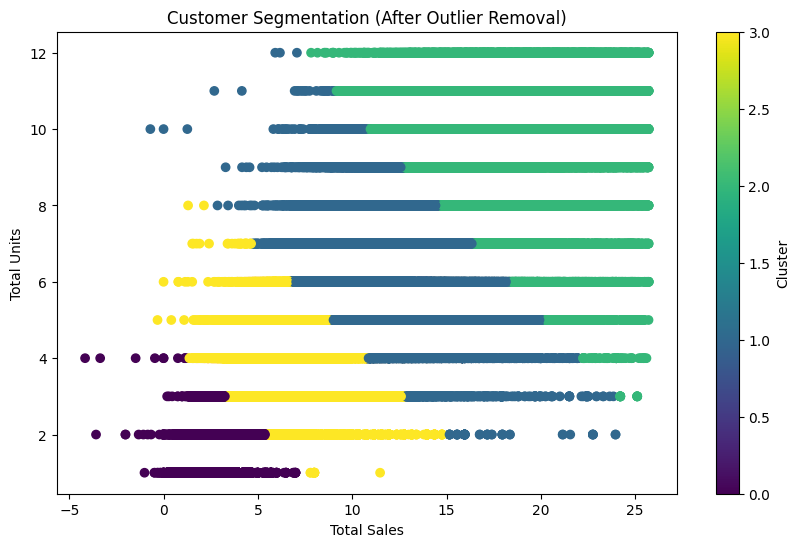

   customerId  total_sales  total_units  cluster
0           1         3.29          2.0        0
2           5         8.91          4.0        3
3           6         0.79          1.0        0
4           7         1.69          1.0        0
5           9         5.11          4.0        3


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select relevant columns for clustering
customer_data = sales_combined_df[['customerId', 'sales', 'units']]

# Step 2: Aggregating data by customerId to get total sales and total units per customer
customer_data_agg = customer_data.groupby('customerId').agg(
    total_sales=('sales', 'sum'),
    total_units=('units', 'sum')
).reset_index()

# Step 3: Remove outliers using the IQR method
Q1 = customer_data_agg[['total_sales', 'total_units']].quantile(0.25)
Q3 = customer_data_agg[['total_sales', 'total_units']].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_customer_data = customer_data_agg[
    (customer_data_agg['total_sales'] >= lower_bound['total_sales']) &
    (customer_data_agg['total_sales'] <= upper_bound['total_sales']) &
    (customer_data_agg['total_units'] >= lower_bound['total_units']) &
    (customer_data_agg['total_units'] <= upper_bound['total_units'])
]

# Step 4: Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_customer_data[['total_sales', 'total_units']])

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 4 clusters for example
filtered_customer_data['cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_customer_data['total_sales'], filtered_customer_data['total_units'], c=filtered_customer_data['cluster'], cmap='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Total Units')
plt.title('Customer Segmentation (After Outlier Removal)')
plt.colorbar(label='Cluster')
plt.show()

# Displaying the aggregated data with clusters
print(filtered_customer_data.head())


In [ ]:
import pandas as pd
from datetime import datetime
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Load the CSV into a Pandas DataFrame
file_path = '/content/drive/MyDrive/Expernetic/sales_combined_df.csv'
sales = pd.read_csv(file_path)

# Ensure datetime column is in the correct format
sales['datetime'] = pd.to_datetime(sales['datetime'])

# Create a new column to flag returns and sales
sales['transaction_type'] = sales['amount'].apply(lambda x: 'return' if x < 0 else 'sale')

# Check the returns data
negative_amount = sales[sales['amount'] < 0]
print(f"Number of returns (negative amounts): {negative_amount.shape[0]}")
print(negative_amount.head())  # Display a few of the negative records

# Extract time-based features
sales['year'] = sales['datetime'].dt.year
sales['month'] = sales['datetime'].dt.month
sales['day'] = sales['datetime'].dt.day
sales['day_of_week'] = sales['datetime'].dt.day_name()  # Extract day of the week as name
sales['hour'] = sales['datetime'].dt.hour  # Extract hour of the day

# 1. Get first purchase date and last purchase date for each customer
first_purchase_date = sales.groupby('customerId')['datetime'].min().reset_index()
first_purchase_date.columns = ['customerId', 'first_purchase_date']

last_purchase_date = sales.groupby('customerId')['datetime'].max().reset_index()
last_purchase_date.columns = ['customerId', 'last_purchase_date']

# 2. Merge first_purchase_date and last_purchase_date into customer_data
customer_data = sales.groupby(['customerId', 'transaction_type']).agg({
    'amount': ['sum', 'mean', 'count'],  # Sum, Average, and Count of amounts
    'units': 'sum',                      # Sum of units
    'voucher': 'sum',                    # Total vouchers used
}).reset_index()

# Flatten multi-level columns
customer_data.columns = ['customerId', 'transaction_type', 'total_amount', 'avg_amount', 'num_transactions', 'total_units', 'total_voucher']

# Merge the first and last purchase dates
customer_data = customer_data.merge(first_purchase_date, on='customerId', how='left')
customer_data = customer_data.merge(last_purchase_date, on='customerId', how='left')

# 3. Calculate recency in days (difference between current date and last purchase date)
current_date = datetime.now()
customer_data['recency_days'] = (current_date - customer_data['last_purchase_date']).dt.days

# 4. Get most frequent day of week and hour for each customer
day_hour_data = sales.groupby('customerId').agg({
    'day_of_week': lambda x: x.mode()[0],  # Most frequent day of the week
    'hour': lambda x: x.mode()[0],        # Most frequent hour of purchase
}).reset_index()

# Merge day and hour data into the customer_data
customer_data = customer_data.merge(day_hour_data, on='customerId', how='left')

# 5. Remove outliers using Z-Score method for numerical columns (e.g., total_amount, total_units, etc.)
# Define the numerical columns to apply z-score to
numerical_columns = ['total_amount', 'avg_amount', 'num_transactions', 'total_units', 'total_voucher', 'recency_days']

# Calculate Z-scores for the numerical columns
z_scores = customer_data[numerical_columns].apply(zscore)

# Set a threshold for Z-scores to identify outliers (e.g., Z-score > 3 or Z-score < -3)
outlier_threshold = 3
customer_data_no_outliers = customer_data[(z_scores < outlier_threshold).all(axis=1)]

# 6. Check if returns are present in the final DataFrame
returns_data = customer_data_no_outliers[customer_data_no_outliers['transaction_type'] == 'return']
print(f"Number of returns in the final data: {returns_data.shape[0]}")
print(returns_data.head())  # Display a few return records

# Final output with all desired columns (after removing outliers)
customer_data_no_outliers = customer_data_no_outliers[['customerId', 'transaction_type', 'total_amount', 'avg_amount', 'num_transactions',
                                                       'total_units', 'total_voucher', 'first_purchase_date', 'last_purchase_date',
                                                       'recency_days', 'day_of_week', 'hour']]

# Inspect the resulting DataFrame
customer_data_no_outliers.head()


Number of returns (negative amounts): 1151
             code                     descrption    type        brand  amount  \
16545  3000005350  A J BTRMLK COMP PNCK MIX 1 LB  Type 1  Aunt Jemima   -0.31   
18232  1600047090  BISQUICK SHK PR BTMK PNK 7 OZ  Type 1     Bisquick   -0.41   
18808  1600047090  BISQUICK SHK PR BTMK PNK 7 OZ  Type 1     Bisquick   -0.01   
18832  1600047090  BISQUICK SHK PR BTMK PNK 7 OZ  Type 1     Bisquick   -0.01   
18930  1600047090  BISQUICK SHK PR BTMK PNK 7 OZ  Type 1     Bisquick   -0.02   

       units  province  customerId  supermarket  basket  voucher  postal-code  \
16545    1.0         1      231520          118  442201        1        30907   
18232    1.0         2       88359          357  184621        1        40383   
18808    1.0         1      200957           59  284520        1        29229   
18832    1.0         1      200957           59  288760        1        29229   
18930    2.0         1      310509           52  302129        1 

,customerId,transaction_type,total_amount,avg_amount,num_transactions,total_units,total_voucher,first_purchase_date,last_purchase_date,recency_days,day_of_week,hour
0,1,sale,3.29,1.6450,2,2.0,0,2022-03-04 10:30:00,2022-03-04 10:30:00,1028,Friday,10
2,5,sale,6.33,2.1100,3,4.0,0,2022-05-12 20:52:00,2022-05-21 18:33:00,950,Saturday,18
3,6,sale,0.79,0.7900,1,1.0,0,2022-12-23 15:16:00,2022-12-23 15:16:00,734,Friday,15
4,7,sale,1.69,1.6900,1,1.0,0,2022-02-15 21:25:00,2022-02-15 21:25:00,1045,Tuesday,21
5,9,sale,5.11,1.2775,4,4.0,0,2022-03-27 13:57:00,2022-06-10 12:03:00,930,Thursday,14


In [ ]:
# Save the processed data
customer_data_no_outliers.to_csv('/content/drive/MyDrive/Expernetic/processed_sales_data.csv', index=False)